# Performance Analysis of Top European Soccer Teams Using Some Advanced Analytics

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from descartes import PolygonPatch
from math import pi

In [2]:
df = pd.read_csv('understat.com.csv')
df.head()

,league,year,position,team,matches,wins,draws,loses,scored,missed,...,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
0,La_liga,2014,1,Barcelona,38,30,4,4,110,21,...,28.444293,7.444293,24.727907,73.049305,5.683535,16.367593,489,114,94.0813,0.0813
1,La_liga,2014,2,Real Madrid,38,30,2,6,118,38,...,42.607198,4.607198,38.890805,47.213090,10.209085,12.929510,351,153,81.7489,-10.2511
2,La_liga,2014,3,Atletico Madrid,38,23,9,6,67,29,...,29.069107,0.069107,26.839271,25.748737,8.982028,9.237091,197,123,73.1353,-4.8647
3,La_liga,2014,4,Valencia,38,22,11,5,70,32,...,39.392572,7.392572,33.446477,16.257501,8.709827,7.870225,203,172,63.7068,-13.2932
4,La_liga,2014,5,Sevilla,38,23,7,8,71,45,...,47.862742,2.862742,41.916529,20.178070,8.276148,9.477805,305,168,67.3867,-8.6133


### Plotting data in map

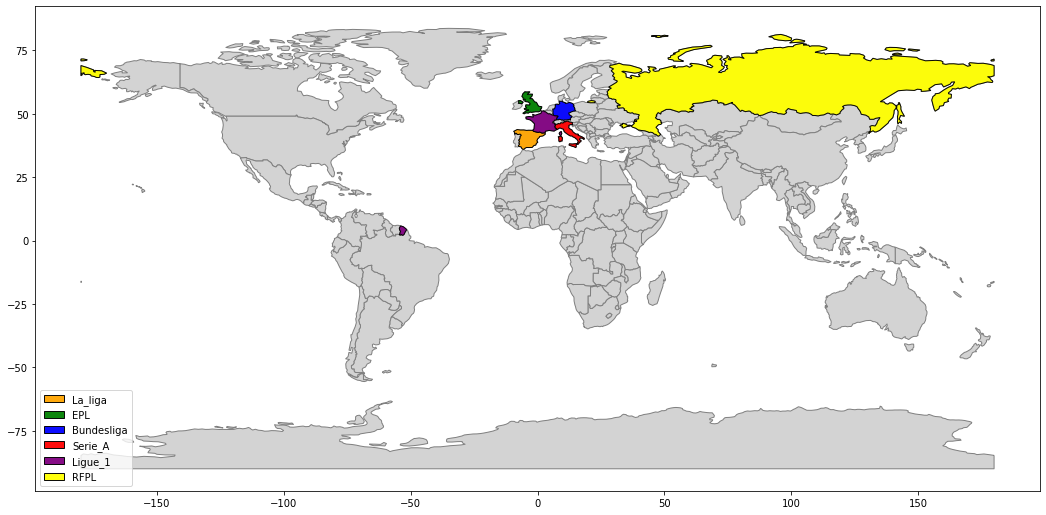

In [3]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

def plotCountryPatch(axes, country_name, fcolor):
    # plot a country on the provided axes
    nami = world[world.name == country_name]
    namigm = nami.__geo_interface__['features']  # geopandas's geo_interface
    namig0 = {'type': namigm[0]['geometry']['type'], \
              'coordinates': namigm[0]['geometry']['coordinates']}
    axes.add_patch(PolygonPatch(namig0, fc=fcolor, ec="black", alpha=0.95, zorder=2))

# plot the whole world
ax2 = world.plot(figsize=(18,15), edgecolor=u'grey', color='lightgray')

# then plot some countries on top
plotCountryPatch(ax2, 'Spain', 'orange')
plotCountryPatch(ax2, 'United Kingdom', 'green')
plotCountryPatch(ax2, 'Germany', 'blue')
plotCountryPatch(ax2, 'Italy', 'red')
plotCountryPatch(ax2, 'France', 'purple')
plotCountryPatch(ax2, 'Russia', 'yellow')

ax2.axis('scaled')
ax2.legend(df['league'].unique())
plt.show()

## The League Champions: 2014-2018

C:\Users\Asif Rezwan\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Asif Rezwan\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Asif Rezwan\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Asif Rezwan\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: 

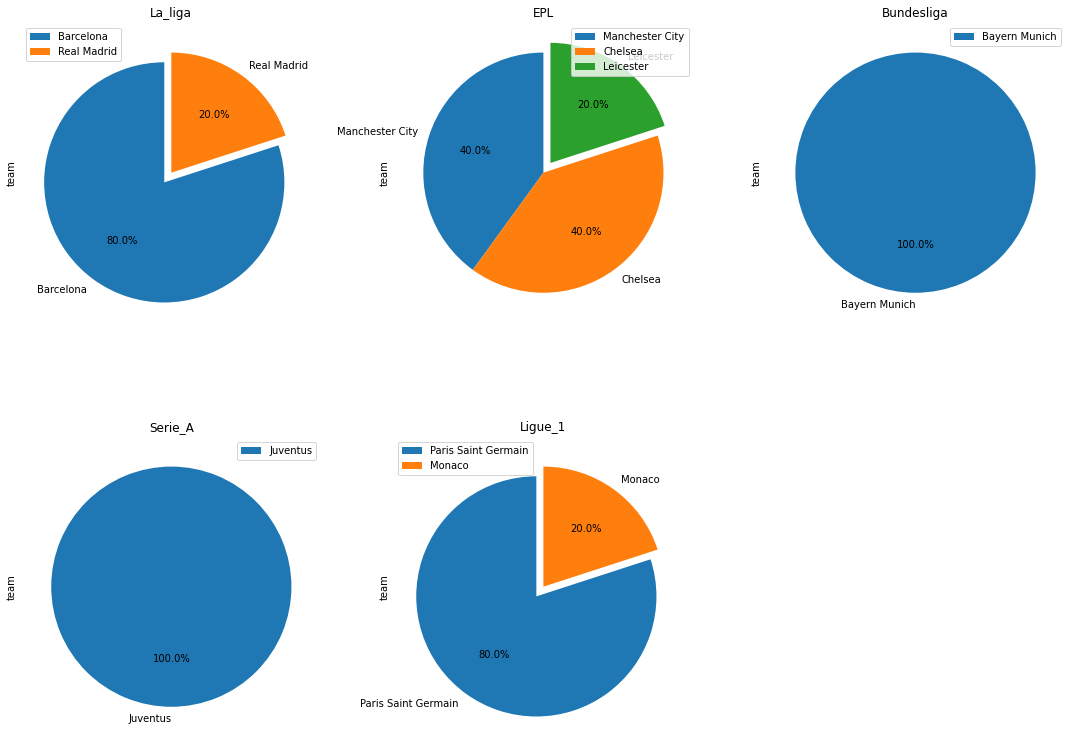

In [4]:
champs_La_liga = df.team[(df['league'] == 'La_liga') & (df['position'] == 1)].value_counts()
champs_EPL = df.team[(df['league'] == 'EPL') & (df['position'] == 1)].value_counts()
champs_Bundesliga = df.team[(df['league'] == 'Bundesliga') & (df['position'] == 1)].value_counts()
champs_Serie_A = df.team[(df['league'] == 'Serie_A') & (df['position'] == 1)].value_counts()
champs_Ligue_1 = df.team[(df['league'] == 'Ligue_1') & (df['position'] == 1)].value_counts()
champs_RFPL = df.team[(df['league'] == 'RFPL') & (df['position'] == 1)].value_counts()

fig = plt.figure()

plt.subplot(2, 3, 1)
champs_La_liga.plot(kind = 'pie', figsize = (15,12), title = 'La_liga', startangle=90, explode = [0.1, 0], autopct='%1.1f%%')
plt.legend(loc="best")

plt.subplot(2, 3, 2)
champs_EPL.plot(kind = 'pie', figsize = (15,12), title = 'EPL', startangle=90, explode = [0, 0, 0.1], autopct='%1.1f%%')
plt.legend(loc="best")

plt.subplot(2, 3, 3)
champs_Bundesliga.plot(kind = 'pie', figsize = (15,12), title = 'Bundesliga', startangle=90, autopct='%1.1f%%')
plt.legend(loc="best")

plt.subplot(2, 3, 4)
champs_Serie_A.plot(kind = 'pie', figsize = (15,12), title = 'Serie_A', startangle=90, autopct='%1.1f%%')
plt.legend(loc="best")

plt.subplot(2, 3, 5)
champs_Ligue_1.plot(kind = 'pie', figsize = (15,12), title = 'Ligue_1', startangle=90, explode = [0.1, 0], autopct='%1.1f%%')
plt.legend(loc="best")

# plt.subplot(2, 3, 6)
# champs_RFPL.plot(kind = 'pie', figsize = (15,12), title = 'RFPL', startangle=90, explode = [0.1, 0, 0, 0], autopct='%1.1f%%')
# plt.legend(loc="best")

plt.tight_layout()
plt.show()

#### Removing RFPL from the comparison due to high randomness

In [5]:
leagues = list(df.league.unique())
leagues.remove('RFPL')
champs = list(df.team[(df.position==1 & df.league.isin(leagues))].unique())

### Expected Goals (xG) – The New Analytics Tool for Measuring the Performance of a Team

#### Number of Goals Scored is not ALWAYS the parameter for sucess, Rather it's the 'Quality of a Shot' - that measures the LIKELIHOOD of a Goal, that is: 'Expected Goal' 

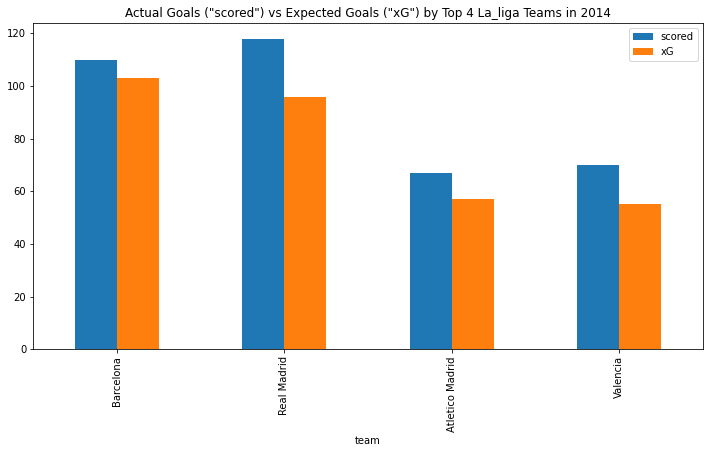

In [6]:
La_liga_top4_2014_scored = df.loc[(df.position<=4)&(df.year==2014)&(df.league=='La_liga')][['team','scored','xG']].set_index('team')
La_liga_top4_2014_scored.plot.bar(figsize = (12,6), title = 'Actual Goals ("scored") vs Expected Goals ("xG") by Top 4 La_liga Teams in 2014')

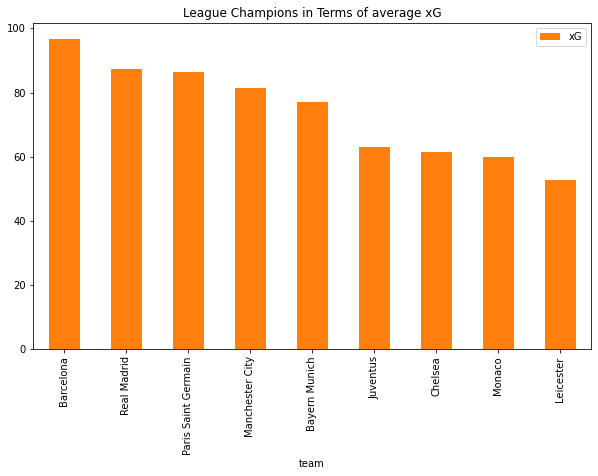

In [20]:
xG_avg_champs = df[df.team.isin(champs)][['team','xG']].set_index('team')
xG_avg_champs.groupby('team').mean().sort_values('xG',ascending=False).plot.bar(figsize = (10,6), color = 'tab:orange',
                                                    title = 'League Champions in Terms of average xG')

#### The quality of Attack
###### xG_diff =  - Actual Goal Scored - Expected Goal
###### A team with a consistently high 'goals scored - xG' indicates excellent shooters. A team with a high xG but lesser goals scored can be due to poor finishing, or being unlucky, or it can also mean that they are taking a lot of useless shots from outside the box.

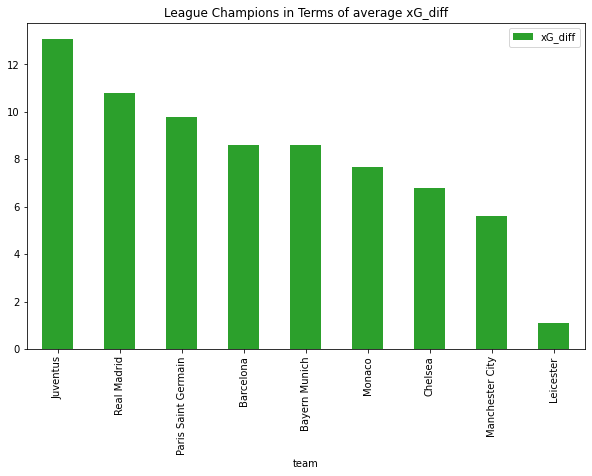

In [8]:
xG_diff_avg_champs = df[df.team.isin(champs)][['team','xG_diff']].set_index('team')
xG_diff_avg_champs['xG_diff'] *= -1
xG_diff_avg_champs.groupby('team').mean().sort_values('xG_diff',ascending=False).plot.bar(figsize = (10,6), color = 'tab:green',
                                                    title = 'League Champions in Terms of average xG_diff')

### The Quality of Defense
##### A team's xGA (xG allowed) can indicate a team's ability to prevent scoring chances. A team that limits their opponent's shots and more importantly, limits their ability to take high probabilty shots will have a lower xGA.
##### It aims to measure the number of goals a team is likely to concede taking into account the quality of chances conceded

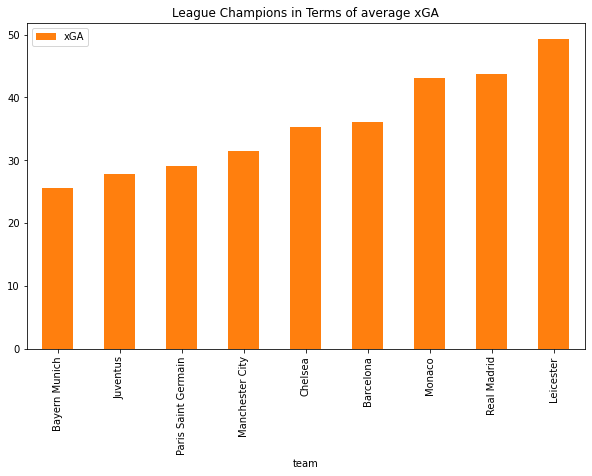

In [9]:
xGA_avg_champs = df[df.team.isin(champs)][['team','xGA']].set_index('team')
xGA_avg_champs.groupby('team').mean().sort_values('xGA',ascending=True).plot.bar(figsize = (10,6), color = 'tab:orange',
                                                    title = 'League Champions in Terms of average xGA')

#### npxGD = Expected Goal Difference net off Penalties 
#### Indicates the chances of winning a game
#### indicate how a team should be performing, or can actually predict the standing of the team in the league

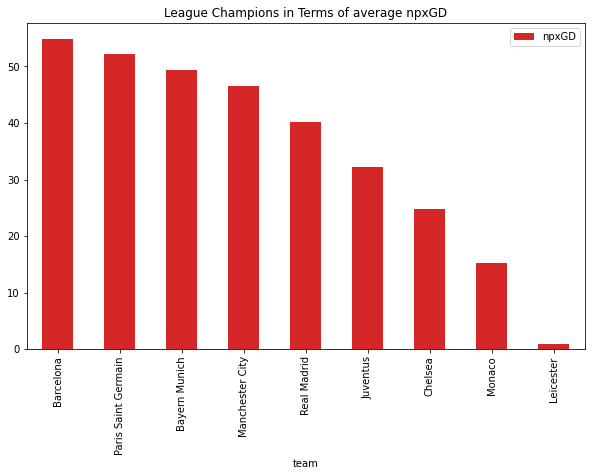

In [10]:
npxGD_avg_champs = df[df.team.isin(champs)][['team','npxGD']].set_index('team')
npxGD_avg_champs.groupby('team').mean().sort_values('npxGD',ascending=False).plot.bar(figsize = (10,6), color = 'tab:red',
                                                    title = 'League Champions in Terms of average npxGD')

##### The PPDA or Passes allowed per Defensive Action addresses the need to quantify the intensity of the pressing of each team. It is calculated by dividing the number of passes allowed in the attacking half by the number of defensive actions taken, intended as interceptions, tackles attempted and fouls committed. The resulting number indicates the frequency of a team’s attempts to recover the ball in the early stages of the other team’s build-up, allowing to measure the defensive pressure in an objective and comparable manner.
###### The greater the offensive pressing brought by a team and the lower the value of the PPDA will be. On the contrary, team that prefers to defend closer to the goal will have a higher PPDA, resulting from the greater number of passes allowed in the attacking half before attempting to recover the ball.
###### Who plays more pressing football?

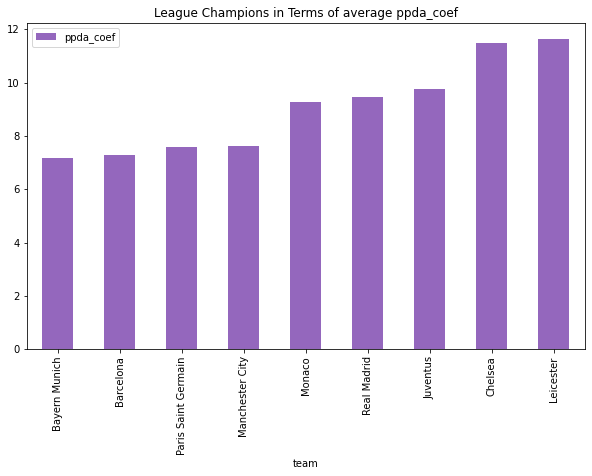

In [11]:
ppda_coef_avg_champs = df[df.team.isin(champs)][['team','ppda_coef']].set_index('team')
ppda_coef_avg_champs.groupby('team').mean().sort_values('ppda_coef',ascending=True).plot.bar(figsize = (10,6),color = 'tab:purple',
                                                    title = 'League Champions in Terms of average ppda_coef')

#### Comparing Leagues in Terms of ppda_coef

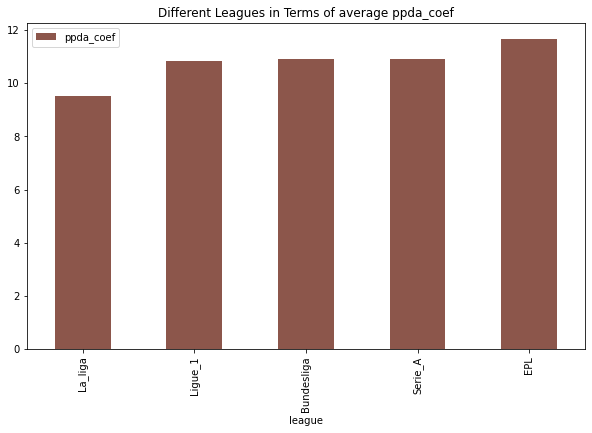

In [12]:
ppda_coef_avg_leagues = df[df.league.isin(leagues)][['league','ppda_coef']].set_index('league')
ppda_coef_avg_leagues.groupby('league').mean().sort_values('ppda_coef',ascending=True).plot.bar(figsize = (10,6),color = 'tab:brown',
                                                    title = 'Different Leagues in Terms of average ppda_coef')

##### ppda trend among the top teams

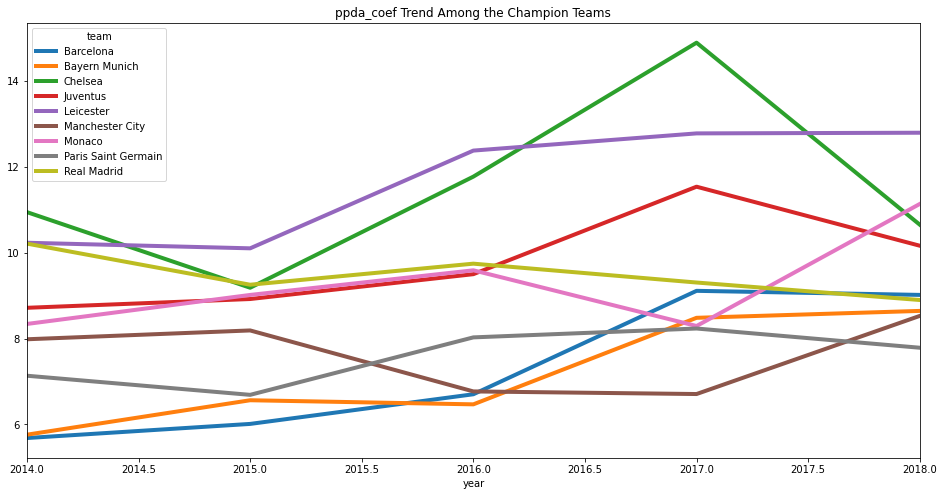

In [13]:
champs_ppda = df.loc[df.team.isin(champs)][['year','team', 'ppda_coef']].reset_index().drop(columns='index')
champs_ppda = champs_ppda.set_index(['year','team']).unstack()['ppda_coef'].plot.line(figsize = (16,8), linewidth=4,
                                                title = 'ppda_coef Trend Among the Champion Teams')

#### passes completed within an estimated 20 yards of goal

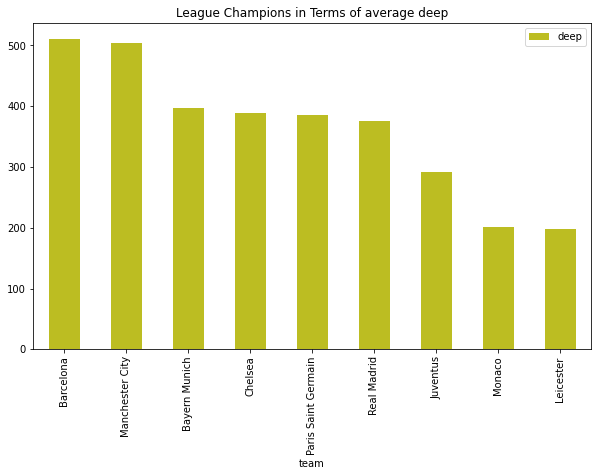

In [14]:
deep_avg_champs = df[df.team.isin(champs)][['team','deep']].set_index('team')
deep_avg_champs.groupby('team').mean().sort_values('deep',ascending=False).plot.bar(figsize = (10,6),color = 'tab:olive',
                                                    title = 'League Champions in Terms of average deep')

### expected points

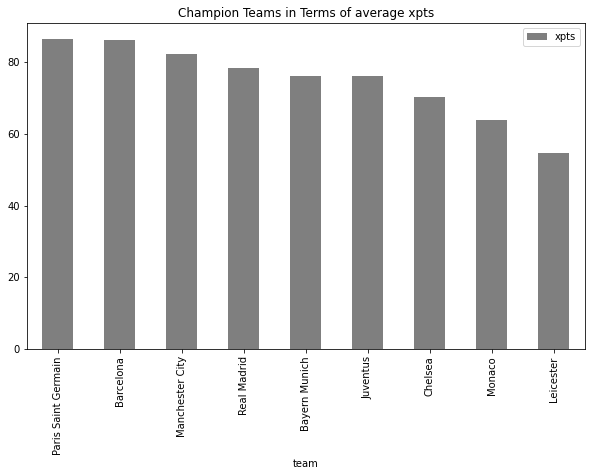

In [15]:
xpts_coef_avg_champs = df[df.team.isin(champs)][['team','xpts']].set_index('team')
xpts_coef_avg_champs.groupby('team').mean().sort_values('xpts',ascending=False).plot.bar(figsize = (10,6), color='tab:grey',
                                                    title = 'Champion Teams in Terms of average xpts')

### Overall Comparison

In [16]:
champs_stat = df[df.team.isin(champs)][['team','xG','xGA','ppda_coef','deep','xpts']].groupby('team').mean().reset_index()
cols_to_normalize = ['xG','xGA','ppda_coef','deep','xpts']
champs_stat[cols_to_normalize] = champs_stat[cols_to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

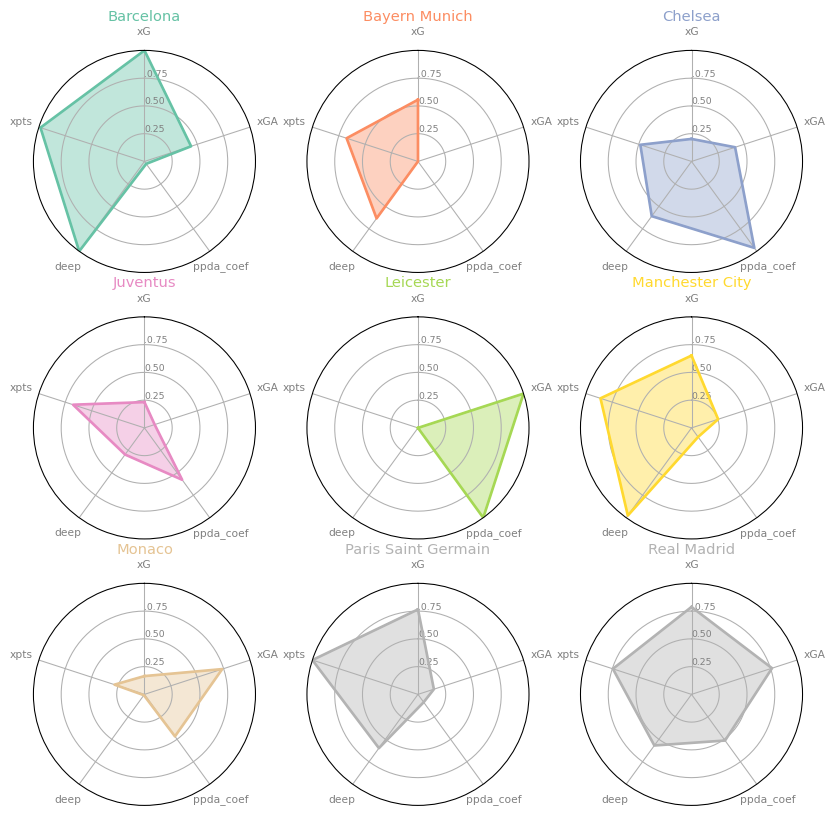

In [17]:
def make_spider(row, title, color):
    # number of variable
    categories=list(champs_stat)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(3,3,row+1, polar=True, )
    
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.25,0.50,0.75], ["0.25","0.50",".0.75"], color="grey", size=7)
    plt.ylim(0,1)
    
    # Ind1
    values=champs_stat.loc[row].drop('team').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
    
    # Add a title
    plt.title(title, size=11, color=color, y=1.1)
    
    # ------- PART 2: Apply to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(champs_stat.index))

# Loop to plot
for row in range(0, len(champs_stat.index)):
    make_spider(row=row, title=''+champs_stat['team'][row], color=my_palette(row))